- Formar datos de train y test
- Formar resultados de XRNN en un dataframe con las fechas como index, la primera columna con los valores reales y las siguientes columnas con los resultados de cada modelo

|date(index) | real_value | xrnn_results | timesnet_results | ... | 
| --- | --- | --- | --- | --- |
|2022-12-01 | 0.5 | 0.4 | 0.3 | ... |
|2023-01-01 | 0.6 | 0.5 | 0.7 | ... |
|2023-02-01 | 0.5 | 0.5 | 0.5 | ... |

- Al generar resultados debería entregarse una serie de pandas con las fechas como index y los valores de las predicciones
- Con eso se puede agregar al dataframe de los resultados haciendo un join con el index

- Las predicciones deben ser desde la fecha siguiente al presente virtual, por lo que en TimesNet debería ser el primer punto de predicción
- Calcular métricas de resultados: MSE, MAE, MAPE, RMSE

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [291]:
home_path_results = "/Users/francisco/Documents/GitHub/Time-Series-Library/results/"

In [292]:
datasets_path = "/home/francisco/Documents/Practica/Time-Series-Library/datasets/"

In [293]:
coffee_df  = pd.read_csv(datasets_path+ 'Coffee_500Exog.csv')
coffee_results_df=  pd.read_csv(datasets_path+ 'Coffee_500Exog_results.csv')
sugar_df  = pd.read_csv(datasets_path+ 'Sugar_500Exog.csv')
sugar_results_df =  pd.read_csv(datasets_path+ 'Sugar_500Exog_results.csv')


In [306]:
results_path = "/home/francisco/Documents/Practica/Time-Series-Library/results/long_term_forecast_coffee_TimesNet_custom_test_data.csv_bs128_lrtype1_ftMS_sl52_ll26_pl52_dm128_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/"

In [307]:
pred = np.load(results_path+'pred.npy')
true = np.load(results_path+'true.npy')
dates = np.load(results_path+'dates.npy')

In [308]:
from datetime import datetime


In [309]:
preds = np.squeeze(pred)
trues = np.squeeze(true)
dates = np.squeeze(dates)

In [310]:
date_s = pd.Series(dates[1])
date = pd.to_datetime(date_s, format='%Y%m%d')

In [311]:
true_df = pd.DataFrame(trues[1])
pred_df = pd.DataFrame(preds[1])
date_df = date.to_frame()

In [312]:
times_df = pd.concat([date_df,true_df,pred_df],axis=1)

In [313]:
times_df.columns = ['date', 'true', 'times' ]

In [315]:
times_df = times_df

In [319]:
total_df = pd.concat([times_df,coffee_results_df['units']],axis=1)
total_df.columns = ['date','true','times','xrnn']

<Axes: xlabel='date'>

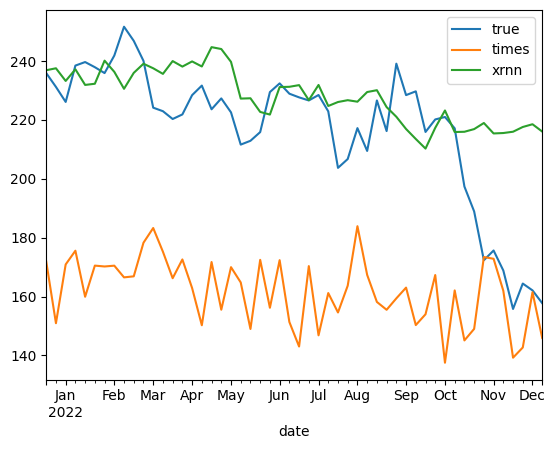

In [320]:
total_df.plot(x='date', y=['true','times','xrnn'], kind='line')